In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd 
from tensorflow import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import os
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
print('done !')

done !


In [2]:
import pathlib 

In [3]:
data_dir = './Problem02/train/'

data_dir = pathlib.Path(data_dir)

In [4]:
data_dir

WindowsPath('Problem02/train')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

0


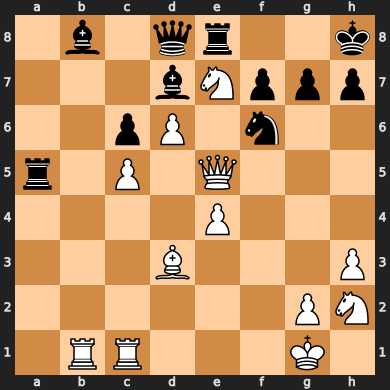

In [6]:
white = list(data_dir.glob('1/*'))
PIL.Image.open(str(white[0]))

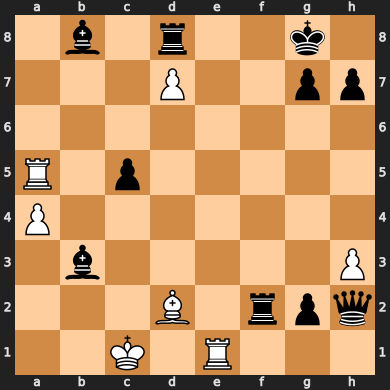

In [7]:
black = list(data_dir.glob('0/*'))
PIL.Image.open(str(black[0]))

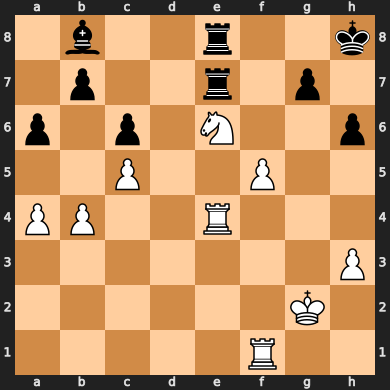

In [8]:
draw = list(data_dir.glob('-1/*'))
PIL.Image.open(str(draw[0]))

In [9]:
batch_size = 32
img_height = 390    
img_width = 390

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 21708 files belonging to 3 classes.
Using 17367 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 21708 files belonging to 3 classes.
Using 4341 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)


['-1', '0', '1']


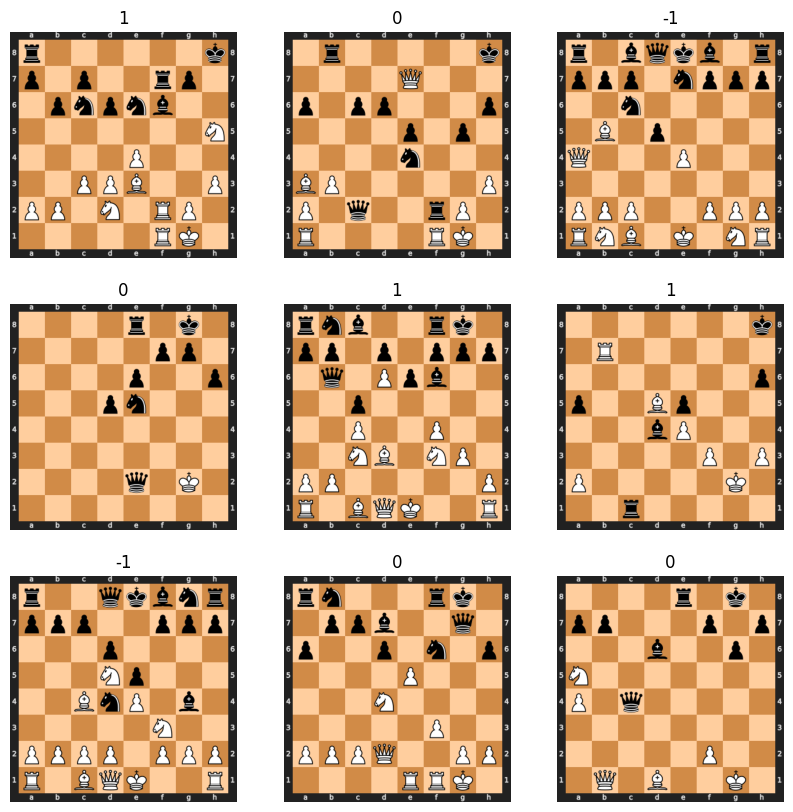

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 390, 390, 3)
(32,)


In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
normalization_layer = layers.Rescaling(1./255)

In [17]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0 1.0


In [18]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 390, 390, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 390, 390, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 195, 195, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 195, 195, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 97, 97, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 97, 97, 64)        1

In [21]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
543/543 [==============================] - 741s 1s/step - loss: 0.8160 - accuracy: 0.6640 - val_loss: 0.6096 - val_accuracy: 0.7445
Epoch 2/10
543/543 [==============================] - 742s 1s/step - loss: 0.5570 - accuracy: 0.7621 - val_loss: 0.5254 - val_accuracy: 0.7763
Epoch 3/10
543/543 [==============================] - 741s 1s/step - loss: 0.4602 - accuracy: 0.8016 - val_loss: 0.4441 - val_accuracy: 0.8095
Epoch 4/10
543/543 [==============================] - 739s 1s/step - loss: 0.3912 - accuracy: 0.8331 - val_loss: 0.3917 - val_accuracy: 0.8358
Epoch 5/10
543/543 [==============================] - 742s 1s/step - loss: 0.3447 - accuracy: 0.8537 - val_loss: 0.3398 - val_accuracy: 0.8602
Epoch 6/10
543/543 [==============================] - 965s 2s/step - loss: 0.3105 - accuracy: 0.8730 - val_loss: 0.4375 - val_accuracy: 0.8136
Epoch 7/10
543/543 [==============================] - 1151s 2s/step - loss: 0.2870 - accuracy: 0.8782 - val_loss: 0.3757 - val_accuracy: 0.840

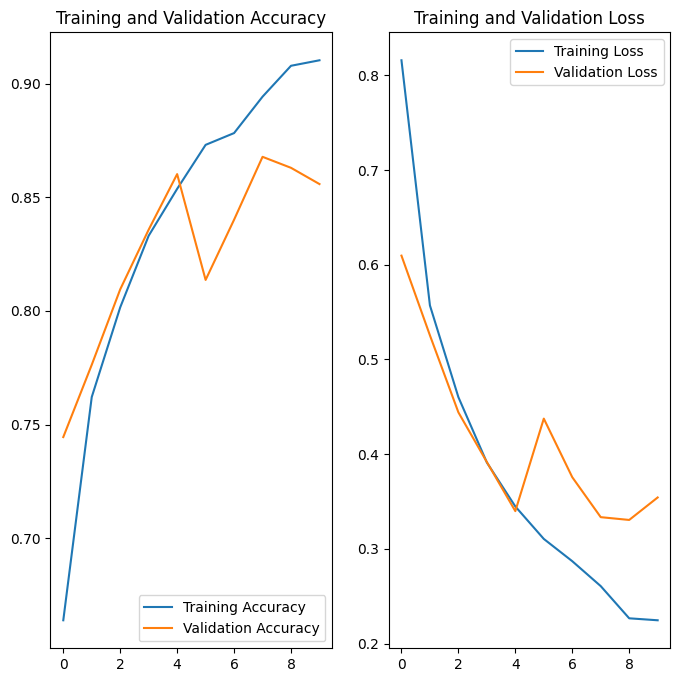

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [23]:
folder_path = './Problem02/test/'
img_width, img_height = 390,390

In [24]:
p = []

for i in range(0,19065):
    patht = f'./Problem02/test/img{i}.png'
    img  = tf.keras.utils.load_img(
    patht, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    p.append(class_names[np.argmax(score)])

1/1 [==============================] - 0s 41ms/step


In [25]:
images = []

for z in range(0,19065):
    images.append(f'img{z}')
    

In [26]:
df = pd.DataFrame({'image' : images , 'label' : p})

In [27]:
df.to_csv('predictions.csv' , index=False)